In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
ls

drive/  sample_data/


In [7]:
cd drive/My\ Drive/ml/ml\ practice/


/content/drive/My Drive/ml/ml practice


In [8]:
ls

diabetes/


In [9]:
cd diabetes/

/content/drive/My Drive/ml/ml practice/diabetes


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data = pd.read_csv('diabetes.csv')

In [12]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [13]:
#what are the columns in the dataset. Let's See
col = data.columns
col

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [0]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [17]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f34c3048e48>,
      dtype=object)

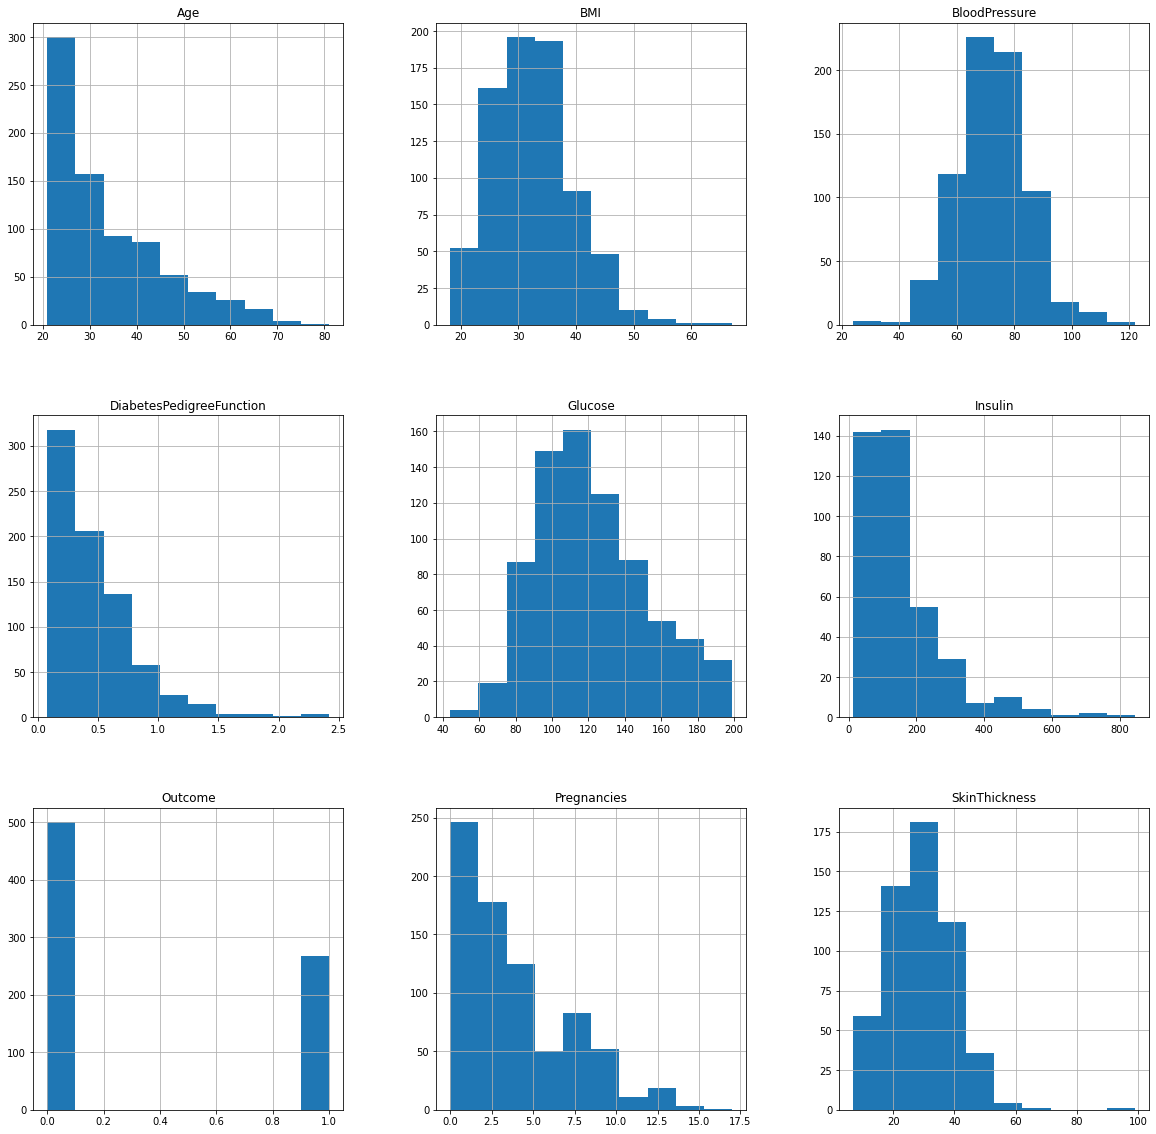

In [18]:
data.hist(figsize=(20,20))

In [19]:
data.count()

Pregnancies                 768
Glucose                     763
BloodPressure               733
SkinThickness               541
Insulin                     394
BMI                         757
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [0]:
data['Glucose'].fillna(data['Glucose'].mean(),inplace=True)

In [0]:
data['BloodPressure'].fillna(data['BloodPressure'].mean(),inplace=True)

In [0]:
data['SkinThickness'].fillna(data['SkinThickness'].mean(),inplace=True)
data['Insulin'].fillna(data['Insulin'].mean(),inplace = True)
data['BMI'].fillna(data['BMI'].mean(),inplace = True)

In [23]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [24]:
data.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [0]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
Y = data.Outcome
X = pd.DataFrame(sc_x.fit_transform(data.drop(['Outcome'],axis = 1)),columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size= 0.3)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [28]:
knn.score(x_test,y_test)

0.7532467532467533

In [79]:
knn.score(x_train,y_train)

0.8324022346368715

In [0]:
test_scores = []


In [30]:
test_scores

[]

In [31]:

for i in range (1,31):
  knn_check = KNeighborsClassifier(i)
  knn_check.fit(x_train,y_train)
  test_scores.append(knn_check.score(x_test,y_test))
test_scores

[0.696969696969697,
 0.7186147186147186,
 0.7489177489177489,
 0.7445887445887446,
 0.7532467532467533,
 0.7272727272727273,
 0.7705627705627706,
 0.7575757575757576,
 0.7748917748917749,
 0.7619047619047619,
 0.7619047619047619,
 0.7402597402597403,
 0.7532467532467533,
 0.7532467532467533,
 0.7489177489177489,
 0.7575757575757576,
 0.7532467532467533,
 0.7662337662337663,
 0.7662337662337663,
 0.7619047619047619,
 0.7662337662337663,
 0.7489177489177489,
 0.7532467532467533,
 0.7489177489177489,
 0.7532467532467533,
 0.7619047619047619,
 0.7662337662337663,
 0.7575757575757576,
 0.7619047619047619,
 0.7748917748917749]

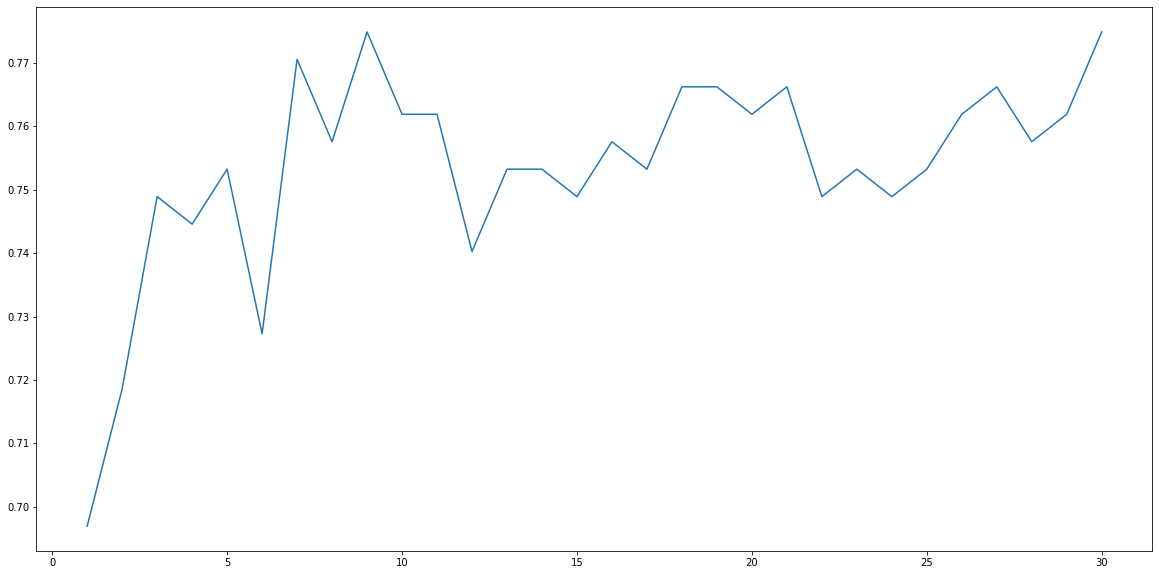

In [32]:
plt.figure(figsize = (20,10))
p = sns.lineplot(range(1,31),test_scores)

In [0]:
knn_final = KNeighborsClassifier(15)

In [34]:
knn_final.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [35]:
knn_final.score(x_train,y_train)

0.770949720670391

In [36]:
knn_final.score(x_test,y_test)

0.7489177489177489

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
y_pred = knn_final.predict(x_test)

In [39]:
confusion_matrix(y_test,y_pred)

array([[125,  24],
       [ 34,  48]])

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       149
           1       0.67      0.59      0.62        82

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.74      0.75      0.74       231



In [0]:
from sklearn.svm import SVC

In [0]:
clf = SVC()

In [42]:
clf.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_pred_svm = clf.predict(x_test)

In [45]:
clf.score(x_train,y_train)

0.8230912476722533

In [46]:
clf.score(x_test,y_test)

0.7662337662337663

In [0]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       149
           1       0.72      0.56      0.63        82

    accuracy                           0.77       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231



In [50]:
confusion_matrix(y_test,y_pred_svm)

array([[131,  18],
       [ 36,  46]])

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
log_reg_clf = LogisticRegression()

In [53]:
log_reg_clf.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred_log_reg = log_reg_clf.predict(x_test)

In [55]:
log_reg_clf.score(x_train,y_train)

0.7783985102420856

In [56]:
log_reg_clf.score(x_test,y_test)

0.7619047619047619

In [81]:
print(classification_report(y_test,y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       149
           1       0.69      0.60      0.64        82

    accuracy                           0.76       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.76      0.76      0.76       231



In [0]:
from sklearn.naive_bayes import GaussianNB

In [0]:
GNB_clf = GaussianNB()

In [59]:
GNB_clf.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [60]:
GNB_clf.score(x_train,y_train)

0.7523277467411545

In [62]:
GNB_clf.score(x_test,y_test)

0.7272727272727273

In [0]:
pred_gnb_clf = GNB_clf.predict(x_test)

In [78]:
confusion_matrix(y_test,pred_gnb_clf)

array([[118,  31],
       [ 32,  50]])

In [67]:
print(classification_report(y_test,pred_gnb_clf))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       149
           1       0.62      0.61      0.61        82

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231



In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
dt_clf = DecisionTreeClassifier()

In [70]:
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [75]:
dt_clf.score(x_train,y_train)

1.0

In [0]:
y_pred_dt = dt_clf.predict(x_test)

In [0]:
from sklearn.metrics import accuracy_score

In [77]:
dt_clf.score(x_test,y_test)

0.7186147186147186

In [83]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       149
           1       0.60      0.63      0.62        82

    accuracy                           0.72       231
   macro avg       0.69      0.70      0.70       231
weighted avg       0.72      0.72      0.72       231



In [0]:
df = {'Algorithm Used' : ['KNN (K nearest neighbors)','SVM (support vector machine)','Logistic Regression','Gaussian Naive Bayes','Decision Tree Classifier']
      ,'Training Accuracy' : [83.24,82.30,77.83,75.23,100],'Testing Accuracy' : [74.89,76.62,76.19,72.72,71.86],
      'precision' : [67,72,69,62,60],'recall' : [59,56,60,61,63]}

In [0]:
result = pd.DataFrame(df)

In [87]:
result

,Algorithm Used,Training Accuracy,Testing Accuracy,precision,recall
0,KNN (K nearest neighbors),83.24,74.89,67,59
1,SVM (support vector machine),82.30,76.62,72,56
2,Logistic Regression,77.83,76.19,69,60
3,Gaussian Naive Bayes,75.23,72.72,62,61
4,Decision Tree Classifier,100.00,71.86,60,63
